The purpose of this notebook is to explore the Covid-19 Dataset of countries that went under lockdown. The dataset was obtained from https://www.kaggle.com/ishivinal/covid19-useful-features-by-country
By Emmanuella Budu

# 1. Preliminaries
First load the relevant libraries and load the dataset

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

In [2]:
#Load the dataset

covid_df= pd.read_csv('C:/Users/Emmanuella\OneDrive - University of Botswana/Zindi/Covid-19 Countries by Lockdown/Countries.csv')

#make a copy of the data set
covid_og_df = covid_df

# 2. Details about the dataset

In [3]:
covid_df.head(10)

,Country_Region,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Lockdown_Date,Lockdown_Type,Country_Code
0,Afghanistan,37172386,14000,2020-03-23,2020-02-25,33.939110,67.709953,17.3,2020-03-24,Full,AFG
1,Albania,2866376,5340000,2020-03-12,2020-03-10,41.153332,20.168331,36.2,2020-03-08,Full,ALB
2,Algeria,42228429,2657000,2020-03-13,2020-02-26,28.033886,1.659626,27.5,2020-03-24,Full,DZA
3,Andorra,77006,3042000,2020-03-23,2020-03-03,42.546245,1.601554,37.0,2020-03-16,Full,AND
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,NaN,NaN,AGO
5,Antigua and Barbuda,96286,269000,2020-04-08,2020-03-14,17.060816,-61.796428,30.7,NaN,NaN,ATG
6,Argentina,44494502,6942000,2020-03-09,2020-03-04,-38.416097,-63.616672,30.8,2020-03-20,Full,ARG
7,Armenia,2951776,1652000,2020-03-27,2020-03-02,40.069099,45.038189,33.9,2020-03-24,Full,ARM
8,Australia,24982688,9246000,2020-03-02,2020-01-26,-25.274398,133.775136,37.4,2020-03-25,Partial,AUS
9,Austria,8840521,30816000,2020-03-13,2020-02-26,47.516231,14.550072,43.2,2020-03-16,Full,AUT


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 11 columns):
Country_Region             184 non-null object
Population_Size            184 non-null int64
Tourism                    184 non-null int64
Date_FirstFatality         156 non-null object
Date_FirstConfirmedCase    184 non-null object
Latitude                   184 non-null float64
Longtitude                 184 non-null float64
Mean_Age                   184 non-null float64
Lockdown_Date              151 non-null object
Lockdown_Type              151 non-null object
Country_Code               184 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 15.9+ KB


Lets identify numerical and categorical features in the dataset

In [5]:
num_features = covid_df.dtypes[covid_df.dtypes != 'object'].index
print('Numerical features', len(num_features))

cat_features = covid_df.dtypes[covid_df.dtypes == 'object'].index
print('Categorical features', len(cat_features))


Numerical features 5
Categorical features 6


In [6]:
print("Numerical features", covid_df[num_features].columns)

print("Categorical features", covid_df[cat_features].columns)

Numerical features Index(['Population_Size', 'Tourism', 'Latitude', 'Longtitude', 'Mean_Age'], dtype='object')
Categorical features Index(['Country_Region', 'Date_FirstFatality', 'Date_FirstConfirmedCase',
       'Lockdown_Date', 'Lockdown_Type', 'Country_Code'],
      dtype='object')


Lets find out if we have any missing values. 

In [7]:
covid_df.isnull().sum()

Country_Region              0
Population_Size             0
Tourism                     0
Date_FirstFatality         28
Date_FirstConfirmedCase     0
Latitude                    0
Longtitude                  0
Mean_Age                    0
Lockdown_Date              33
Lockdown_Type              33
Country_Code                0
dtype: int64

Features 'Date_FirstFatality', 'Lockdown_Date ' and 'Lockdown_Type' have some missing values. Before we decide on what to do, we will consider the the percentage of missing values.

In [8]:
missing_values = covid_df.isnull().sum().sort_values(ascending=False)
percentage_values = (covid_df.isnull().sum()/covid_df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_values,percentage_values], axis=1)

missing_data.head(10)

,0,1
Lockdown_Type,33,0.179348
Lockdown_Date,33,0.179348
Date_FirstFatality,28,0.152174
Country_Code,0,0.000000
Mean_Age,0,0.000000
Longtitude,0,0.000000
Latitude,0,0.000000
Date_FirstConfirmedCase,0,0.000000
Tourism,0,0.000000
Population_Size,0,0.000000


The percentage of missing values is neglligible hence we will fill in the missing values with zeros. 

In [9]:
covid_df=covid_df.fillna(0)

# 3. Feature Correlation

A correlation matrix is only given for numerical features in the dataset

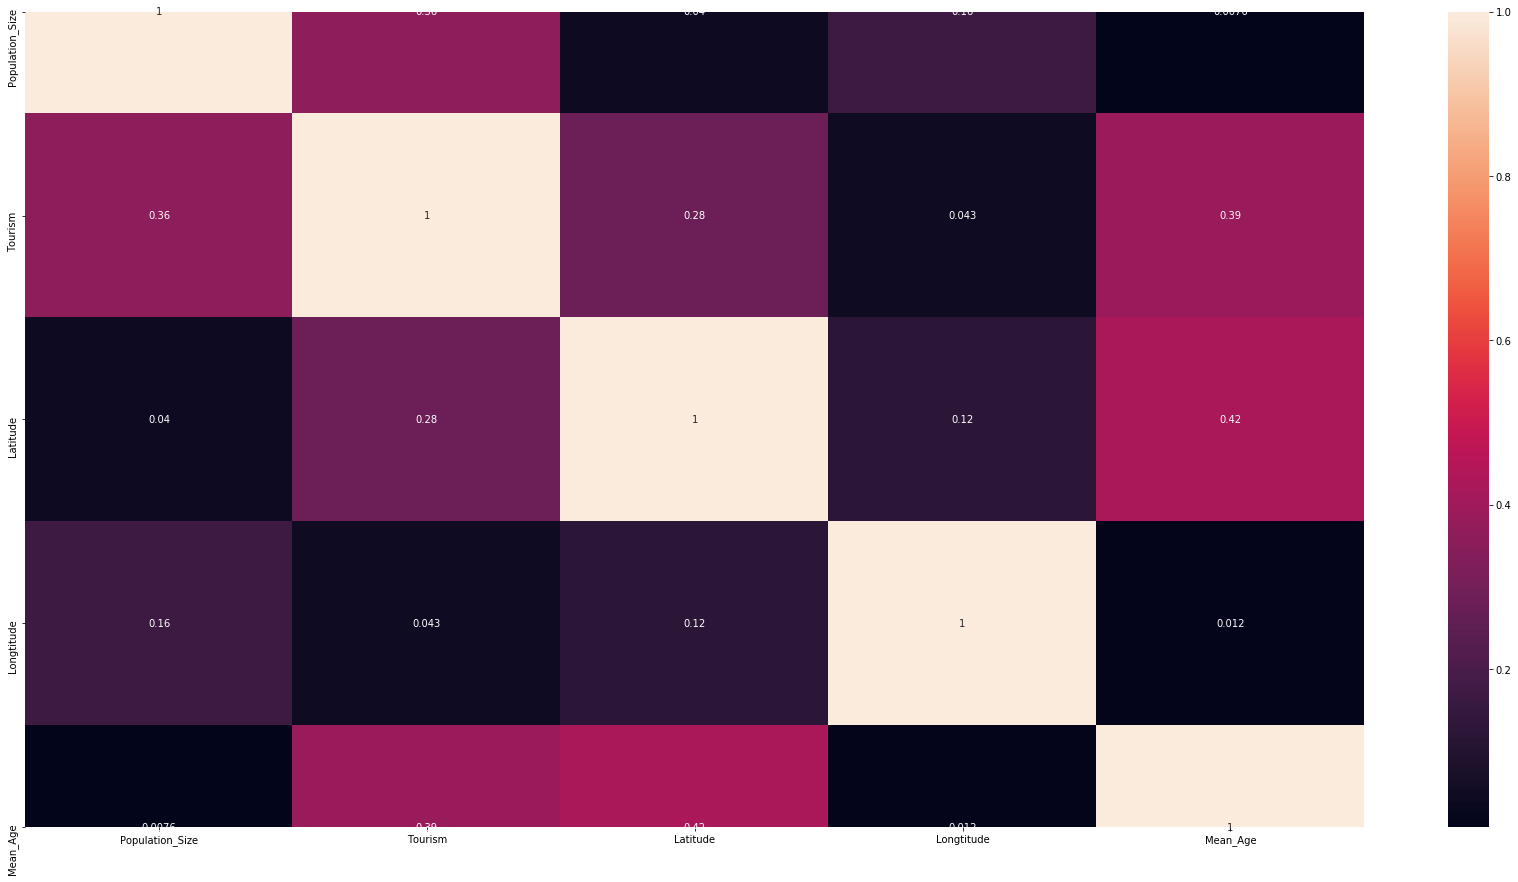

In [10]:
plt.figure(figsize=(30,15))
cor = covid_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

From the viualization above we can conclude that the features are not highly correlated.


# 4. Analysis on the features

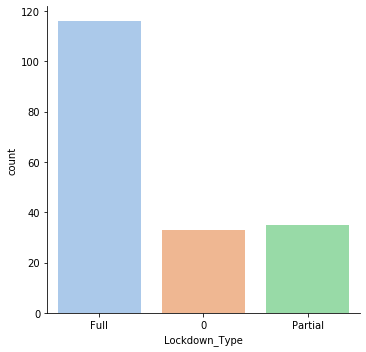

In [11]:
# Feature: Lockdown_Type

sns.catplot(x='Lockdown_Type', kind="count", palette="pastel", data=covid_df);

Most of the lockdowns imposed were full lockdowns.

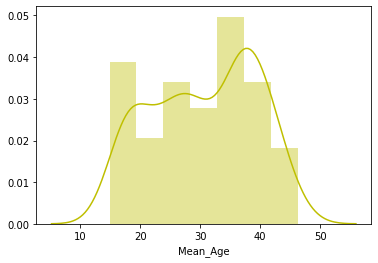

In [12]:
# Feature:Mean_Age

sns.distplot(a=covid_df['Mean_Age'],label="Age",color='y')

Mean age recorded in most countries tat went under lockdown is around 35 years. 

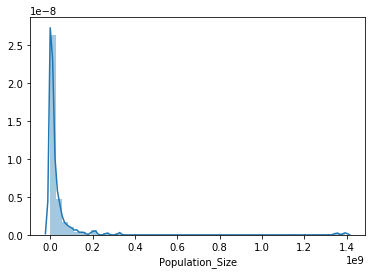

In [13]:
# Feature:Population_Size
sns.distplot(a=covid_df['Population_Size'],label="Population")

The population of most countries that went into lockdown is less than 200 million.

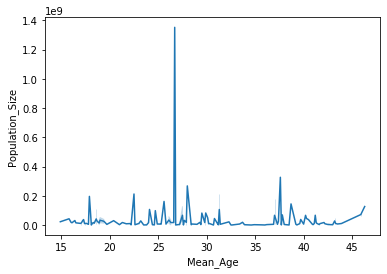

In [14]:
sns.lineplot(x=covid_df['Mean_Age'], y=covid_df['Population_Size'])

An interesting relationship is seen here with the 'Mean_Age' and 'Population_Size'. It is clear that the country with the highest population has a mean_age of approximately 27.

The following features are date features, hence we will separate the date into three separate features, namely,year, month and day

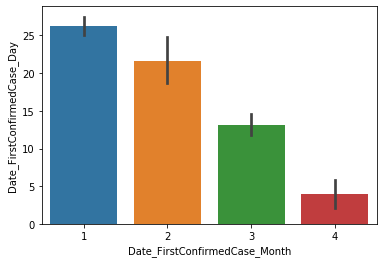

In [15]:
#Feature :Date_FirstConfirmedCase
covid_df['Date_FirstConfirmedCase_Year']= pd.DatetimeIndex(covid_df['Date_FirstConfirmedCase']).year
covid_df['Date_FirstConfirmedCase_Month']= pd.DatetimeIndex(covid_df['Date_FirstConfirmedCase']).month
covid_df['Date_FirstConfirmedCase_Day']= pd.DatetimeIndex(covid_df['Date_FirstConfirmedCase']).day



sns.barplot(x=covid_df['Date_FirstConfirmedCase_Month'], y=covid_df['Date_FirstConfirmedCase_Day'])

For this feature, all the cases were first confirmed in the year 2020, hence we did not visualize the year.
The visualization above reveals that the first cases were confirmed in January which is the first month, with most cases being recorded towards the end of the month.

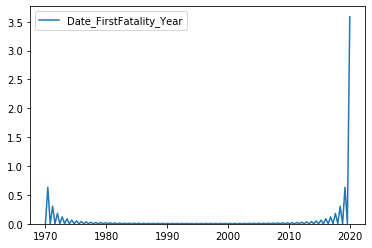

In [16]:
#Feature :Date of First Fatality
covid_df['Date_FirstFatality_Year']= pd.DatetimeIndex(covid_df['Date_FirstFatality']).year
covid_df['Date_FirstFatality_Month']= pd.DatetimeIndex(covid_df['Date_FirstFatality']).month
covid_df['Date_FirstFatality_Day']= pd.DatetimeIndex(covid_df['Date_FirstFatality']).day


sns.kdeplot(data=covid_df['Date_FirstFatality_Year'])



So its pretty strange why we have 1970 in our datset but on the other hand 2020 is the year in which the first fatalies were recorded.

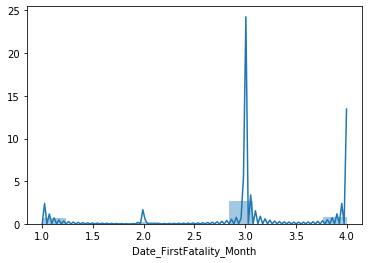

In [17]:
sns.distplot(a=covid_df['Date_FirstFatality_Month'])

Most of the first fatalities were recorded in the month of March which is the third month.

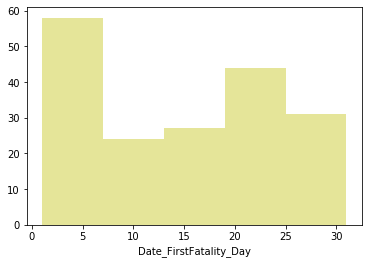

In [18]:
sns.distplot(a=covid_df['Date_FirstFatality_Day'], kde=False, color='y')

We had a lot of fatalities occuring within the first five days of the month.

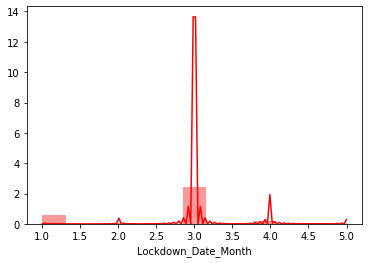

In [19]:
#Feature:Lockdown_Date
covid_df['Lockdown_Date_Year']= pd.DatetimeIndex(covid_df['Lockdown_Date']).year
covid_df['Lockdown_Date_Month']= pd.DatetimeIndex(covid_df['Lockdown_Date']).month
covid_df['Lockdown_Date_Day']= pd.DatetimeIndex(covid_df['Lockdown_Date']).day

sns.distplot(a=covid_df['Lockdown_Date_Month'],color='red')

Most of the lockdowns came into efect in the third month which is March. Recall that March was when most of the fatalities were recorded. A possible reason could be that countries went under lockdown when people started dying from COVID-19.

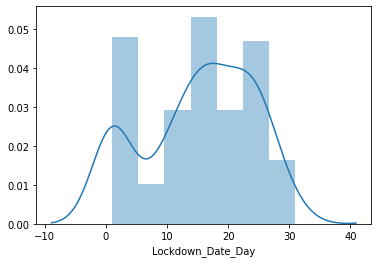

In [20]:
sns.distplot(a=covid_df['Lockdown_Date_Day'] )

Lockdowns were mostly effected during the middle of the month.